In [1]:
import numpy as np
import pandas as pd
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV,train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import StratifiedKFold
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
columns = ['Age','Workclass','fnlgwt','Education','Education num','Marital Status',
           'Occupation','Relationship','Race','Sex','Capital Gain','Capital Loss',
           'Hours/Week','Native country','Income']
train_set=pd.read_csv('/home/manish/Downloads/Machine Learning ipynb files/assignment/adult.data',header=None,names=columns)

In [3]:
train_set.head()

,Age,Workclass,fnlgwt,Education,Education num,Marital Status,Occupation,Relationship,Race,Sex,Capital Gain,Capital Loss,Hours/Week,Native country,Income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [4]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32561 non-null  int64 
 1   Workclass       32561 non-null  object
 2   fnlgwt          32561 non-null  int64 
 3   Education       32561 non-null  object
 4   Education num   32561 non-null  int64 
 5   Marital Status  32561 non-null  object
 6   Occupation      32561 non-null  object
 7   Relationship    32561 non-null  object
 8   Race            32561 non-null  object
 9   Sex             32561 non-null  object
 10  Capital Gain    32561 non-null  int64 
 11  Capital Loss    32561 non-null  int64 
 12  Hours/Week      32561 non-null  int64 
 13  Native country  32561 non-null  object
 14  Income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [5]:
columns = ['Workclass','Education','Education num','Marital Status','Occupation','Relationship',
           'Race','Sex','Capital Gain','Capital Loss','Hours/Week','Native country']

for column in columns:
    print("{0} unique is {1}".format(column,train_set[column].unique()))
    print("\n")

Workclass unique is [' State-gov' ' Self-emp-not-inc' ' Private' ' Federal-gov' ' Local-gov'
 ' ?' ' Self-emp-inc' ' Without-pay' ' Never-worked']


Education unique is [' Bachelors' ' HS-grad' ' 11th' ' Masters' ' 9th' ' Some-college'
 ' Assoc-acdm' ' Assoc-voc' ' 7th-8th' ' Doctorate' ' Prof-school'
 ' 5th-6th' ' 10th' ' 1st-4th' ' Preschool' ' 12th']


Education num unique is [13  9  7 14  5 10 12 11  4 16 15  3  6  2  1  8]


Marital Status unique is [' Never-married' ' Married-civ-spouse' ' Divorced'
 ' Married-spouse-absent' ' Separated' ' Married-AF-spouse' ' Widowed']


Occupation unique is [' Adm-clerical' ' Exec-managerial' ' Handlers-cleaners' ' Prof-specialty'
 ' Other-service' ' Sales' ' Craft-repair' ' Transport-moving'
 ' Farming-fishing' ' Machine-op-inspct' ' Tech-support' ' ?'
 ' Protective-serv' ' Armed-Forces' ' Priv-house-serv']


Relationship unique is [' Not-in-family' ' Husband' ' Wife' ' Own-child' ' Unmarried'
 ' Other-relative']


Race unique is [' White' ' B

In [6]:
###Workclass unique ,Native country,Occupation has null values
##Drop columns Education as Education num column describes this in numerical form

In [7]:
train_set['Workclass'].value_counts()

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: Workclass, dtype: int64

In [8]:
train_set['Occupation'].value_counts()

 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3770
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 ?                    1843
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name: Occupation, dtype: int64

In [9]:
train_set['Native country'].value_counts()

 United-States                 29170
 Mexico                          643
 ?                               583
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Guatemala                        64
 Japan                            62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                             31
 

In [10]:
###removing the blank spaces
for col in columns:
    if train_set[col].dtype=='object':
        print(col)
        train_set[col]=train_set[col].apply(lambda x:x.replace(" ",""))

Workclass
Education
Marital Status
Occupation
Relationship
Race
Sex
Native country


In [11]:
#removing ? from Workclass ,Native country,Occupation

In [12]:
colm=['Workclass','Native country','Occupation']
for col in colm:
    train_set[col].replace('?',np.nan,inplace=True)

In [13]:
###Visualization

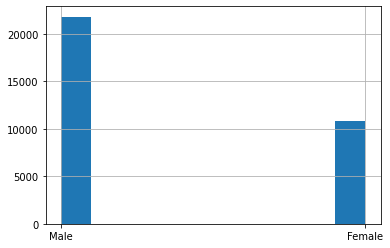

In [14]:
train_set['Sex'].hist()

In [15]:
###Dropping column Education and converting Income to 0 and 1

df=train_set.copy()

df=df.drop(columns=['Education'])

In [16]:
df['Income']=df['Income'].apply(lambda x: 1 if x==' >50K' else 0)

([0, 1, 2, 3, 4, 5, 6], <a list of 7 Text major ticklabel objects>)

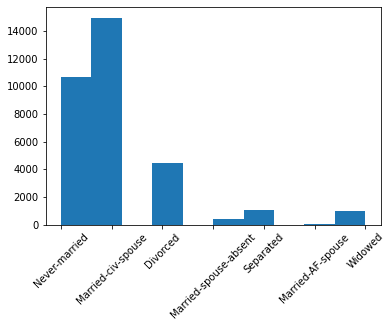

In [17]:
plt.hist(df['Marital Status'])
plt.xticks(rotation=45)

<Figure size 1800x1440 with 0 Axes>

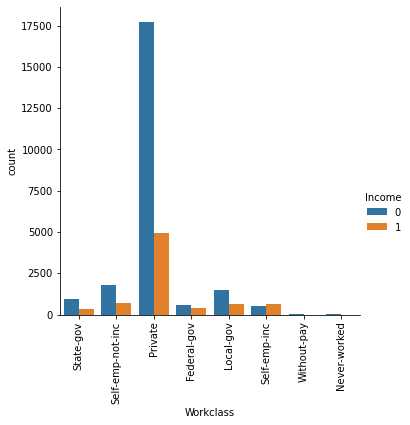

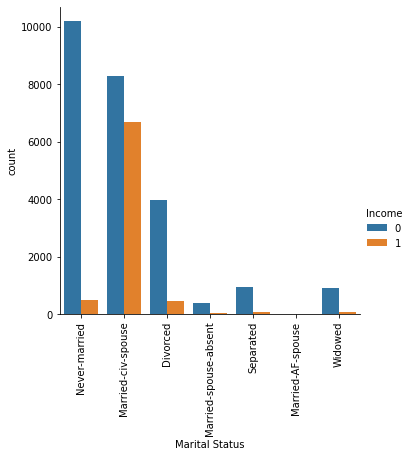

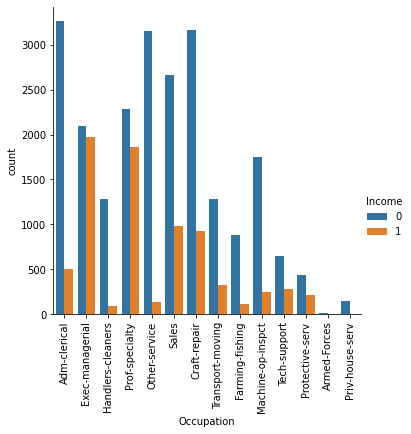

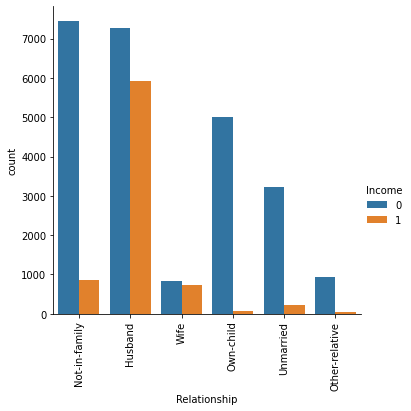

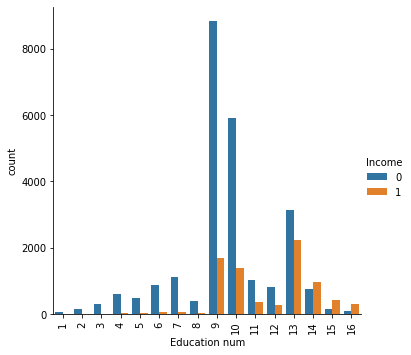

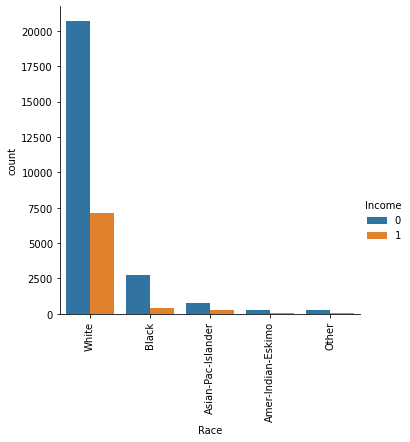

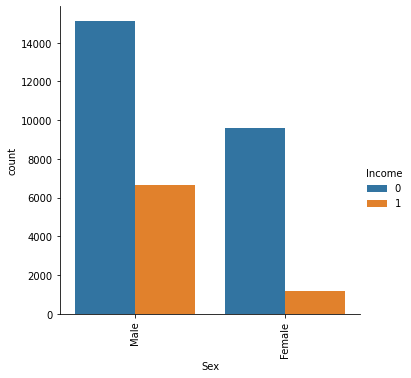

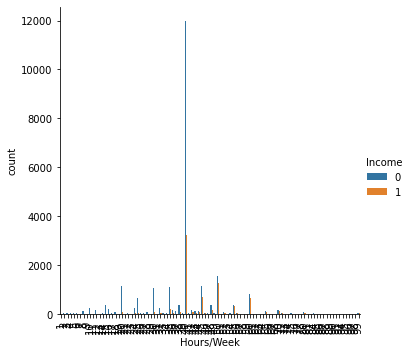

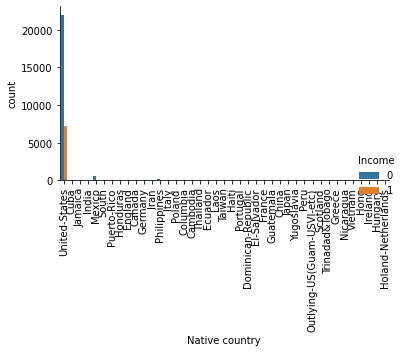

In [18]:
columns = ['Workclass','Marital Status','Occupation','Relationship','Education num',
           'Race','Sex','Hours/Week','Native country']
plt.figure(figsize=(25,20),facecolor='white')
plotnumber=1
for col in columns:
    sns.catplot(x=col, hue='Income', kind='count',data=df)
    plt.xticks(rotation=90)
    plt.xlabel(col)

plt.tight_layout()

In [19]:
df1=df.groupby('Native country').groups

In [20]:
df1

{'Cambodia': Int64Index([  255,  1975,  4303,  4785,  5560,  7980,  8014, 11134, 11637,
             16068, 17382, 18075, 20494, 21503, 21851, 22669, 27480, 28995,
             32129],
            dtype='int64'),
 'Canada': Int64Index([  112,   266,   593,  1051,  1314,  1379,  1688,  1938,  2284,
              2327,
             ...
             28582, 29020, 29333, 29614, 30032, 30288, 30623, 30969, 32093,
             32112],
            dtype='int64', length=121),
 'China': Int64Index([  873,  1092,  1217,  1515,  1708,  1717,  1932,  2323,  2432,
              3627,  3647,  3714,  3987,  4598,  4972,  5435,  5786,  6065,
              6387,  7202,  8075,  8112,  8478,  8508,  9067,  9147,  9202,
              9525,  9836,  9957, 10480, 11188, 11986, 12070, 14074, 14147,
             14194, 14273, 14374, 14531, 14927, 15762, 15978, 17412, 17540,
             17568, 20194, 20561, 20775, 21370, 22028, 22076, 22487, 22564,
             23019, 23460, 23483, 23741, 24330, 24940, 25002, 

In [21]:
#one hot encoding for columns Marital Status, Relationship,Race,Sex
columns = ['Marital Status','Relationship','Race','Sex']
df_conversion=df.copy()
df_conversion=pd.concat([df_conversion,pd.get_dummies(df_conversion[['Marital Status','Relationship','Race','Sex']])],axis=1)

In [22]:
df_conversion=df_conversion.drop(columns=['Marital Status','Relationship','Race','Sex'])

In [23]:
df_conversion.head()

,Age,Workclass,fnlgwt,Education num,Occupation,Capital Gain,Capital Loss,Hours/Week,Native country,Income,...,Relationship_Own-child,Relationship_Unmarried,Relationship_Wife,Race_Amer-Indian-Eskimo,Race_Asian-Pac-Islander,Race_Black,Race_Other,Race_White,Sex_Female,Sex_Male
0,39,State-gov,77516,13,Adm-clerical,2174,0,40,United-States,0,...,0,0,0,0,0,0,0,1,0,1
1,50,Self-emp-not-inc,83311,13,Exec-managerial,0,0,13,United-States,0,...,0,0,0,0,0,0,0,1,0,1
2,38,Private,215646,9,Handlers-cleaners,0,0,40,United-States,0,...,0,0,0,0,0,0,0,1,0,1
3,53,Private,234721,7,Handlers-cleaners,0,0,40,United-States,0,...,0,0,0,0,0,1,0,0,0,1
4,28,Private,338409,13,Prof-specialty,0,0,40,Cuba,0,...,0,0,1,0,0,1,0,0,1,0


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 <a list of 14 Text major ticklabel objects>)

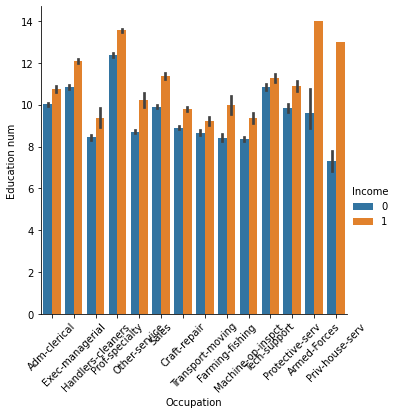

In [24]:
sns.catplot(x='Occupation',y='Education num',hue='Income',kind='bar',data=df_conversion)
plt.xticks(rotation=45)

In [25]:
##In each occupation if education is high then the income is above 50 k and profession has no relation with the 
##income directly and there is no need of prefrence given to any profession so we can use one hot encoding here

In [26]:
df_conversion=pd.concat([df_conversion,pd.get_dummies(df_conversion[['Occupation','Workclass']])],axis=1)

In [27]:
df_conversion=df_conversion.drop(columns=['Occupation','Workclass'])

In [28]:
df_conversion.head()

,Age,fnlgwt,Education num,Capital Gain,Capital Loss,Hours/Week,Native country,Income,Marital Status_Divorced,Marital Status_Married-AF-spouse,...,Occupation_Tech-support,Occupation_Transport-moving,Workclass_Federal-gov,Workclass_Local-gov,Workclass_Never-worked,Workclass_Private,Workclass_Self-emp-inc,Workclass_Self-emp-not-inc,Workclass_State-gov,Workclass_Without-pay
0,39,77516,13,2174,0,40,United-States,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,50,83311,13,0,0,13,United-States,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,38,215646,9,0,0,40,United-States,0,1,0,...,0,0,0,0,0,1,0,0,0,0
3,53,234721,7,0,0,40,United-States,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,28,338409,13,0,0,40,Cuba,0,0,0,...,0,0,0,0,0,1,0,0,0,0


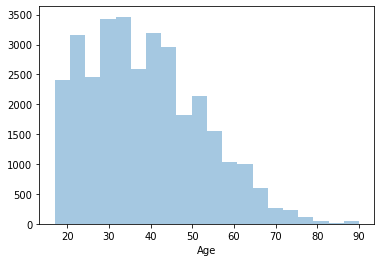

In [29]:
sns.distplot(df_conversion['Age'],kde=False,bins=20)

In [30]:
##bin encoding for Age and Hours/Week
df_conversion.loc[df_conversion['Age']<=22,'Age']=0
df_conversion.loc[(df_conversion['Age']>22)&(df_conversion['Age']<=30),'Age']=1
df_conversion.loc[(df_conversion['Age']>30)&(df_conversion['Age']<=40),'Age']=2
df_conversion.loc[(df_conversion['Age']>40)&(df_conversion['Age']<=50),'Age']=3
df_conversion.loc[(df_conversion['Age']>50)&(df_conversion['Age']<=60),'Age']=4
df_conversion.loc[(df_conversion['Age']>60),'Age']=5

In [31]:
df_conversion['Age'].value_counts()

2    8546
3    6983
1    6677
4    4128
0    3895
5    2332
Name: Age, dtype: int64

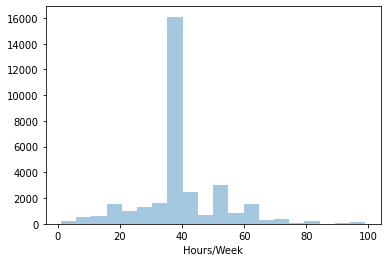

In [32]:
sns.distplot(df_conversion['Hours/Week'],bins=20,kde=False)

In [33]:
df_conversion.loc[df_conversion['Hours/Week']<=20,'Hours']=0
df_conversion.loc[(df_conversion['Hours/Week']>20) & (df_conversion['Hours/Week']<=30),'Hours']=1
df_conversion.loc[(df_conversion['Hours/Week']>30) & (df_conversion['Hours/Week']<=35),'Hours']=2
df_conversion.loc[(df_conversion['Hours/Week']>35) & (df_conversion['Hours/Week']<=37),'Hours']=3
df_conversion.loc[(df_conversion['Hours/Week']>37) & (df_conversion['Hours/Week']<=40),'Hours']=4
df_conversion.loc[(df_conversion['Hours/Week']>40) & (df_conversion['Hours/Week']<=45),'Hours']=5
df_conversion.loc[(df_conversion['Hours/Week']>45) & (df_conversion['Hours/Week']<=50),'Hours']=6
df_conversion.loc[(df_conversion['Hours/Week']>50) & (df_conversion['Hours/Week']<=60),'Hours']=7
df_conversion.loc[(df_conversion['Hours/Week']>60) & (df_conversion['Hours/Week']<=70),'Hours']=8
df_conversion.loc[df_conversion['Hours/Week']>70,'Hours']=9

In [34]:
df_conversion=df_conversion.drop(columns=['Hours/Week'])

In [35]:
df_conversion.head()

,Age,fnlgwt,Education num,Capital Gain,Capital Loss,Native country,Income,Marital Status_Divorced,Marital Status_Married-AF-spouse,Marital Status_Married-civ-spouse,...,Occupation_Transport-moving,Workclass_Federal-gov,Workclass_Local-gov,Workclass_Never-worked,Workclass_Private,Workclass_Self-emp-inc,Workclass_Self-emp-not-inc,Workclass_State-gov,Workclass_Without-pay,Hours
0,2,77516,13,2174,0,United-States,0,0,0,0,...,0,0,0,0,0,0,0,1,0,4.0
1,3,83311,13,0,0,United-States,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0.0
2,2,215646,9,0,0,United-States,0,1,0,0,...,0,0,0,0,1,0,0,0,0,4.0
3,4,234721,7,0,0,United-States,0,0,0,1,...,0,0,0,0,1,0,0,0,0,4.0
4,1,338409,13,0,0,Cuba,0,0,0,1,...,0,0,0,0,1,0,0,0,0,4.0


In [36]:
##Cluster the native country as United_States=1 and other=0 as the other countries are having neglegible values
##as compared to United states

df_conversion['Native country']=df_conversion['Native country'].apply(lambda x: 1 if x=='United-States' else 0)

In [37]:
df_conversion.head()

,Age,fnlgwt,Education num,Capital Gain,Capital Loss,Native country,Income,Marital Status_Divorced,Marital Status_Married-AF-spouse,Marital Status_Married-civ-spouse,...,Occupation_Transport-moving,Workclass_Federal-gov,Workclass_Local-gov,Workclass_Never-worked,Workclass_Private,Workclass_Self-emp-inc,Workclass_Self-emp-not-inc,Workclass_State-gov,Workclass_Without-pay,Hours
0,2,77516,13,2174,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,4.0
1,3,83311,13,0,0,1,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0.0
2,2,215646,9,0,0,1,0,1,0,0,...,0,0,0,0,1,0,0,0,0,4.0
3,4,234721,7,0,0,1,0,0,0,1,...,0,0,0,0,1,0,0,0,0,4.0
4,1,338409,13,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,4.0


In [38]:
X=df_conversion.drop(columns=['Income'])
y=df_conversion['Income']

In [39]:
train_x,test_x,train_y,test_y=train_test_split(X,y,test_size=0.2,random_state=42)

In [40]:
model=XGBClassifier(objective='binary:logistic')
model.fit(train_x,train_y)

XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method=None,
              validate_parameters=False, verbosity=None)

In [41]:
y_pred = model.predict(test_x)
predictions = [round(value) for value in y_pred]
accuracy = accuracy_score(test_y,predictions)
print(accuracy)
print(model.score(train_x,train_y))
print(model.score(test_x,test_y))

0.8757868877629357
0.8995700245700246
0.8757868877629357


In [47]:
param_grid={
    'max_depth': [3,5,10,20],
    'n_estimators':[10,50,100,200],
    'reg_lambda':[0.1,0.2,0.4,1,3,6]
    'gamma':[0.01,000.1,0.1,0.2,2,3,10,20],
    'learning_rate':[0.0001, 0.001, 0.01, 0.1, 0.2, 0.3],
    }

In [48]:
grid=GridSearchCV(model,param_grid=param_grid,n_jobs=-1,cv=5,verbose=3)

In [49]:
grid.fit(train_x,train_y)

Fitting 5 folds for each of 96 candidates, totalling 480 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    7.0s
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:  3.9min
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed: 11.1min
[Parallel(n_jobs=-1)]: Done 480 out of 480 | elapsed: 41.0min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=XGBClassifier(base_score=0.5, booster=None,
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0, gpu_id=-1,
                                     importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=0.300000012,
                                     max_delta_step=0, max_depth=6,
                                     min_child_weight=1, missing=nan,
                                     monotone_constraints=None,
                                     n_estimators=100, n_jobs=...
                                     objective='binary:logistic',
                                     random_state=0, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, subsample=1,
                                     tree_method=None,
           

In [50]:
grid.best_params_

{'max_depth': 5, 'n_estimators': 100, 'reg_lambda': 6}

In [52]:
model_grid=XGBClassifier('max_depth'=5, 'n_estimators'=100, 'reg_lambda'= 6)

SyntaxError: keyword can't be an expression (<ipython-input-52-3d001ebce1bd>, line 1)